In [46]:
import pandas as pd
df = pd.read_csv('data_9_3.csv', index_col = 0)
df

,Small,Moderate,Large,Total
Placebo,25,8,5,38
Vaccine,6,18,11,35


a) conventional chi-square test

In [47]:
df.loc['Total'] = [31, 26, 16, 73]
df

,Small,Moderate,Large,Total
Placebo,25,8,5,38
Vaccine,6,18,11,35
Total,31,26,16,73


In [48]:
df_without_total = df.iloc[:-1, :-1]
df_expected = df.iloc[:-1, :-1]
df_expected[:] = None
df_expected

,Small,Moderate,Large
Placebo,None,None,None
Vaccine,None,None,None


In [49]:
import itertools
for i, j in list(itertools.product(df_expected.index, df_expected.columns)):
    df_expected.loc[i, j] = df.loc[i, 'Total'] * df.loc['Total', j] / df.loc['Total', 'Total']
df_expected

,Small,Moderate,Large
Placebo,16.136986,13.534247,8.328767
Vaccine,14.863014,12.465753,7.671233


In [52]:
chi_square = ((df_without_total - df_expected)**2 / df_expected).sum().sum()
chi_square

17.647832398925356

In [55]:
from scipy import stats
p_value = stats.chi2.pdf(chi_square , 2)
round(p_value, 4)

0.0001

we conclude that the distribution is not the same for the placebo and vaccine groups

c) Part 2: Sketch a rough diagram to illustrate the model which forms the conceptual base for this analysis (see Exercise 8.4).

Text(0.5, 1.0, 'Cutoffs for placebo group')

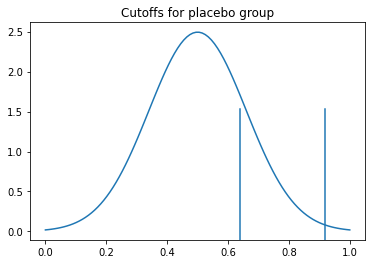

In [62]:
import numpy as np
import matplotlib.pyplot as plt
placebo_cutoffs =  [0.6376976, 0.9199318]
x_axis = np.linspace(0,1, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.5, 0.16))
for cutoff in placebo_cutoffs:
    plt.axvline(cutoff, 0, 0.6)
plt.title('Cutoffs for placebo group')

Text(0.5, 1.0, 'Cutoffs for vaccine group')

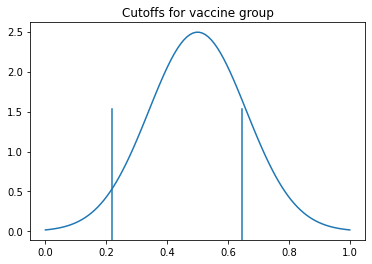

In [63]:
vaccine_cutoffs = [0.2188492, 0.6464910]
x_axis = np.linspace(0,1, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.5, 0.16))
for cutoff in vaccine_cutoffs:
    plt.axvline(cutoff, 0, 0.6)
plt.title('Cutoffs for vaccine group')